In [10]:
# --- CELL 1: SETUP ENVIRONMENT ---
import os
from google.colab import drive

# 1. Mount Drive (Your Data)
drive.mount('/content/drive')

# 2. Sync Code from GitHub
REPO_URL = "https://github.com/brauner68/gm_proj.git"
REPO_NAME = "gm_proj"

if not os.path.exists(f"/content/{REPO_NAME}"):
    print(f"⬇️ Cloning {REPO_NAME}...")
    !git clone {REPO_URL}
else:
    print(f"🔄 Repo exists. Pulling latest changes...")
    %cd /content/{REPO_NAME}
    !git pull

# 3. Enter Project Folder
%cd /content/{REPO_NAME}

# 4. Install Dependencies (The Magic Step)
# This reads your requirements.txt and installs everything at once
print("📦 Installing libraries from requirements.txt...")
!pip install -q -r requirements.txt

print("\n✅ SETUP COMPLETE! You are ready to work.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
🔄 Repo exists. Pulling latest changes...
/content/gm_proj
Already up to date.
/content/gm_proj
📦 Installing libraries from requirements.txt...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 29.9 MB/s eta 0:00:00

✅ SETUP COMPLETE! You are ready to work.


In [12]:
# --- CELL 2: EXTRACT ONE SAMPLE ---
import tarfile

# Define paths
# Note: Check if your folder is named 'NeuralSynth_Project' or 'NeuralSynth'
tar_path = '/content/drive/Shareddrives/gm_proj/nsynth-valid.jsonwav.tar.gz'
extract_path = '/content/temp_data'

print(f"📂 looking for file at: {tar_path}")

if not os.path.exists(tar_path):
    print("❌ ERROR: File not found in Drive. Check the path!")
else:
    # Open the tar file and extract just ONE audio file
    if not os.path.exists(extract_path):
        os.makedirs(extract_path)

    print("⏳ Extracting one file for testing...")
    with tarfile.open(tar_path, 'r:gz') as tar:
        # Loop until we find a .wav file (skip folders/json)
        for member in tar:
            if member.name.endswith('.wav'):
                tar.extract(member, path=extract_path)
                print(f"✅ Success! Extracted: {member.name}")
                extracted_file_path = os.path.join(extract_path, member.name)
                break

📂 looking for file at: /content/drive/Shareddrives/gm_proj/nsynth-valid.jsonwav.tar.gz
⏳ Extracting one file for testing...
✅ Success! Extracted: nsynth-valid/audio/reed_acoustic_018-071-050.wav


/tmp/ipython-input-884165803.py:23: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extract(member, path=extract_path)


🔊 Loaded Audio: Shape=torch.Size([1, 64000]), Sample Rate=16000
🖼️ Spectrogram Shape: torch.Size([1, 64, 126]) (Channels, Freq, Time)


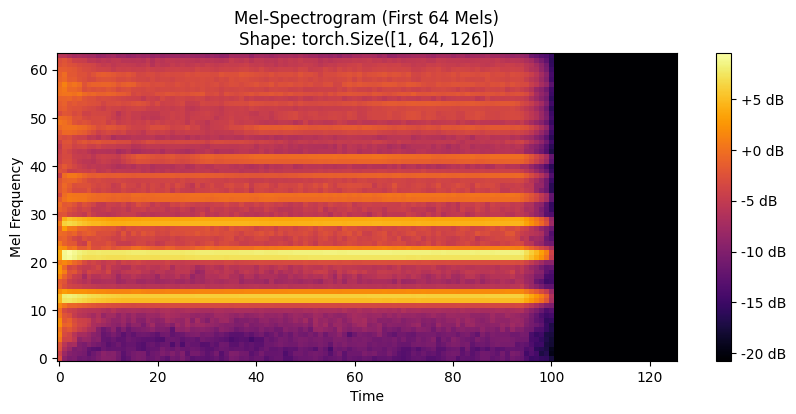

In [13]:
# --- CELL 3: VISUALIZE ---
import torch
import torchaudio
import torchaudio.transforms as T
import matplotlib.pyplot as plt

# 1. Load the Audio
waveform, sample_rate = torchaudio.load(extracted_file_path)
print(f"🔊 Loaded Audio: Shape={waveform.shape}, Sample Rate={sample_rate}")

# 2. Define the Transform (Audio -> Image)
# These are the standard settings for 16kHz audio
mel_spectrogram = T.MelSpectrogram(
    sample_rate=sample_rate,
    n_fft=1024,
    hop_length=512,
    n_mels=64  # This sets the image height to 64 pixels
)

# 3. Convert
spec = mel_spectrogram(waveform)
# Apply Log to make it look like a real image (Decibels)
spec = torch.log(spec + 1e-9)

print(f"🖼️ Spectrogram Shape: {spec.shape} (Channels, Freq, Time)")

# 4. Plot
plt.figure(figsize=(10, 4))
plt.imshow(spec[0].numpy(), origin='lower', aspect='auto', cmap='inferno')
plt.colorbar(format='%+2.0f dB')
plt.title(f"Mel-Spectrogram (First 64 Mels)\nShape: {spec.shape}")
plt.xlabel('Time')
plt.ylabel('Mel Frequency')
plt.show()